In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [202]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [203]:
#df.info()
#df.describe().transpose()
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

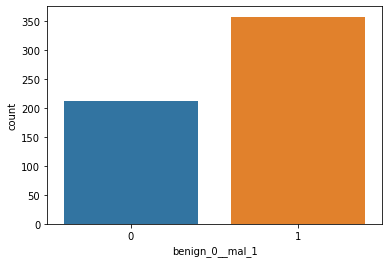

In [204]:
sns.countplot(data = df, x= 'benign_0__mal_1')

<AxesSubplot:>

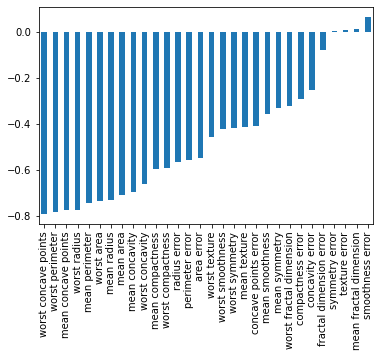

In [205]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

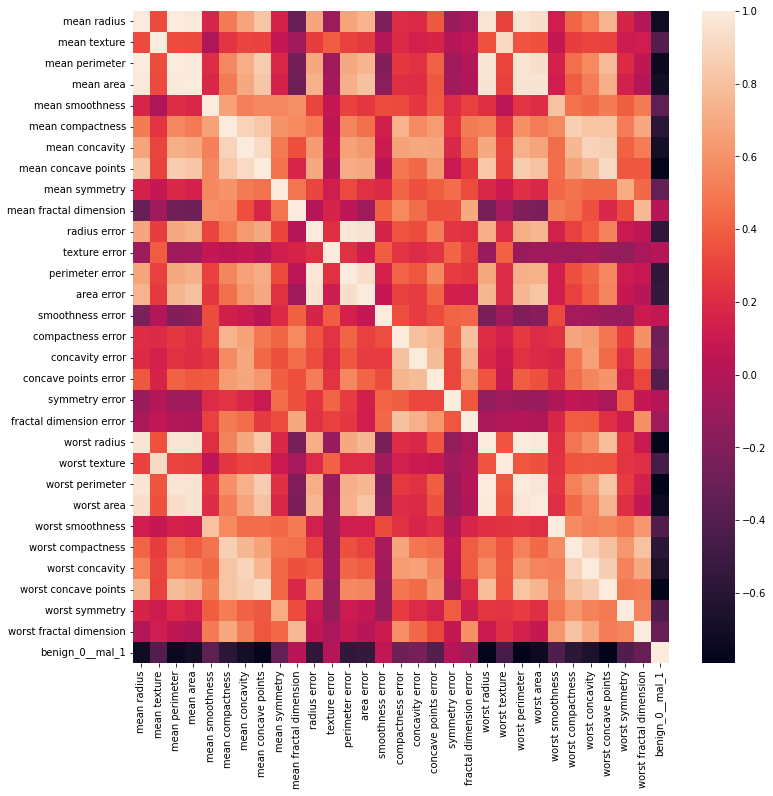

In [206]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

In [207]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
scaler = MinMaxScaler()

In [212]:
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [213]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [214]:
X_train.shape

(426, 30)

In [215]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'Adam')

In [216]:
from tensorflow.keras.callbacks import EarlyStopping

In [217]:
#help(EarlyStopping)

In [231]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 30)

In [232]:
model.fit(x = X_train, y = y_train, epochs = 300, validation_data=(X_test, y_test), callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/300
426/426 [==============================] - 0s 168us/sample - loss: 0.1568 - val_loss: 0.1137
Epoch 2/300
426/426 [==============================] - 0s 105us/sample - loss: 0.1516 - val_loss: 0.1195
Epoch 3/300
426/426 [==============================] - 0s 112us/sample - loss: 0.1442 - val_loss: 0.1131
Epoch 4/300
426/426 [==============================] - 0s 108us/sample - loss: 0.1324 - val_loss: 0.1149
Epoch 5/300
426/426 [==============================] - 0s 106us/sample - loss: 0.1485 - val_loss: 0.1131
Epoch 6/300
426/426 [==============================] - 0s 106us/sample - loss: 0.1493 - val_loss: 0.1189
Epoch 7/300
426/426 [==============================] - 0s 102us/sample - loss: 0.1287 - val_loss: 0.1093
Epoch 8/300
426/426 [==============================] - 0s 102us/sample - loss: 0.1231 - val_loss: 0.1107
Epoch 9/300
426/426 [==============================] - 0s 104us/sample - loss: 0.1237 - val_loss: 0.1167
Epoch 10/

Epoch 78/300
426/426 [==============================] - 0s 118us/sample - loss: 0.1053 - val_loss: 0.1097
Epoch 79/300
426/426 [==============================] - 0s 113us/sample - loss: 0.0963 - val_loss: 0.1179
Epoch 80/300
426/426 [==============================] - 0s 102us/sample - loss: 0.0779 - val_loss: 0.1169
Epoch 00080: early stopping


In [233]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

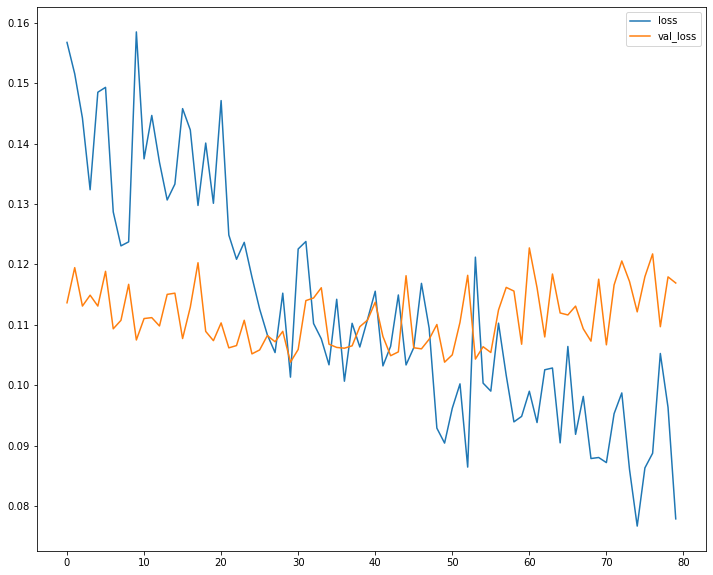

In [234]:
losses.plot(figsize = (12, 10))

In [235]:
from tensorflow.keras.layers import Dropout

In [236]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'Adam')

In [237]:
model.fit(x = X_train, y = y_train, epochs = 300, validation_data=(X_test, y_test), callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/300
426/426 [==============================] - 1s 1ms/sample - loss: 0.7111 - val_loss: 0.6889
Epoch 2/300
426/426 [==============================] - 0s 104us/sample - loss: 0.6765 - val_loss: 0.6702
Epoch 3/300
426/426 [==============================] - 0s 105us/sample - loss: 0.6655 - val_loss: 0.6525
Epoch 4/300
426/426 [==============================] - 0s 105us/sample - loss: 0.6515 - val_loss: 0.6280
Epoch 5/300
426/426 [==============================] - 0s 106us/sample - loss: 0.6374 - val_loss: 0.6028
Epoch 6/300
426/426 [==============================] - 0s 107us/sample - loss: 0.6252 - val_loss: 0.5753
Epoch 7/300
426/426 [==============================] - 0s 107us/sample - loss: 0.6074 - val_loss: 0.5405
Epoch 8/300
426/426 [==============================] - 0s 106us/sample - loss: 0.5760 - val_loss: 0.5134
Epoch 9/300
426/426 [==============================] - 0s 105us/sample - loss: 0.5575 - val_loss: 0.4850
Epoch 10/30

Epoch 78/300
426/426 [==============================] - 0s 117us/sample - loss: 0.1284 - val_loss: 0.0884
Epoch 79/300
426/426 [==============================] - 0s 110us/sample - loss: 0.1316 - val_loss: 0.1080
Epoch 80/300
426/426 [==============================] - 0s 109us/sample - loss: 0.1305 - val_loss: 0.0964
Epoch 81/300
426/426 [==============================] - 0s 110us/sample - loss: 0.1181 - val_loss: 0.0885
Epoch 82/300
426/426 [==============================] - 0s 110us/sample - loss: 0.1220 - val_loss: 0.0874
Epoch 83/300
426/426 [==============================] - 0s 109us/sample - loss: 0.1076 - val_loss: 0.0953
Epoch 84/300
426/426 [==============================] - 0s 113us/sample - loss: 0.1147 - val_loss: 0.0882
Epoch 85/300
426/426 [==============================] - 0s 115us/sample - loss: 0.1226 - val_loss: 0.0864
Epoch 86/300
426/426 [==============================] - 0s 113us/sample - loss: 0.1092 - val_loss: 0.0868
Epoch 87/300
426/426 [========================

In [238]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

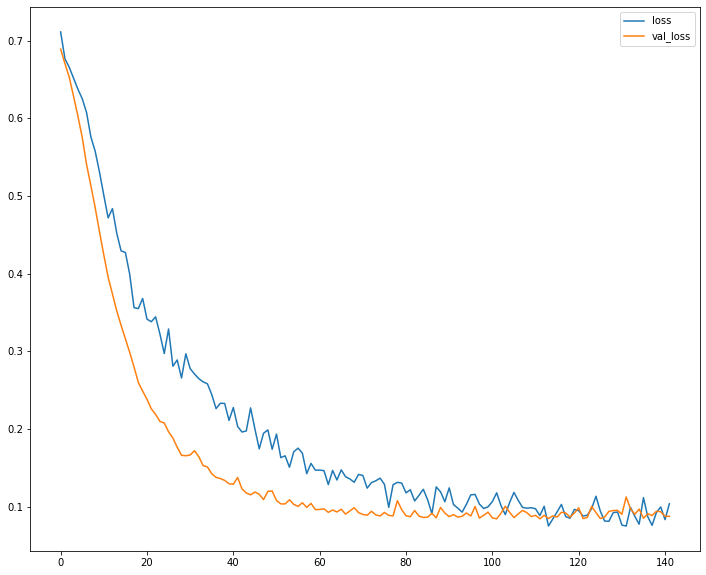

In [239]:
model_loss.plot(figsize = (12, 10))

In [240]:
predictions = model.predict_classes(X_test)

In [241]:
from sklearn.metrics import classification_report, confusion_matrix

In [242]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [243]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 1 87]]
